# For viewing the classification metrics and creating plots

# TODO: cell 30 data aggregation...

In [20]:
# imports
import pandas as pd
import sklearn.metrics as metrics
import numpy as np
import matplotlib.pyplot as plt
import os

# display options
pd.options.display.max_columns = 60

In [19]:
# data_pth='/mnt/g/Planet/project_data/classification_stats_x4_400000_global_valid_mod.csv'
# data_pth='/mnt/g/Planet/project_data/classification_stats_x4_400000_shield2_hold_mod_first2k.csv'
# data_pth='/mnt/g/Planet/project_data/classification_stats_x10_local-masked_400000_tmp_1k.csv'
data_pth='/home/ethan_kyzivat/code/pixel-smasher/classification_stats_x10_local-masked_400000_save.csv'

plots_dir='/data_dir/other/figs'
data=pd.read_csv(data_pth)
del data['Unnamed: 0']
data.head()

,num,name,thresh,res,percent_water,mean_ndwi,median_ndwi,kappa,kappa_p,min_ndwi,max_ndwi
0,0,20170710_181144_1034_3B_AnalyticMS_SR_s0235,0.0,SR,8.512153,201.99965,215.0,0.981379,0.223808,3.0,255.0
1,0,20170710_181144_1034_3B_AnalyticMS_SR_s0235,0.0,HR,8.506076,207.88528,222.0,NaN,NaN,12.0,255.0
2,0,20170710_181144_1034_3B_AnalyticMS_SR_s0235,0.0,LR,8.637153,207.84766,222.0,NaN,NaN,18.0,255.0
3,0,20170710_181144_1034_3B_AnalyticMS_SR_s0235,0.0,Bic,8.746528,207.83630,222.0,0.969385,-0.164399,8.0,255.0
4,1,20170708_181118_102a_3B_AnalyticMS_SR_s0175,0.0,SR,16.425347,203.24974,232.0,0.974029,0.205630,17.0,255.0


## Now, filter data by image and/or resolution

In [3]:
# filter to verifiy number of images
data[['num','res','thresh','kappa']].head()
print(f'Number of images: {data.num.unique().size}')

SyntaxError: invalid syntax (<ipython-input-3-1dd8e1a7af32>, line 3)

In [4]:
## Set kappa prime values that are negative to zero to avoid biasing the averaging!
# Avoiding chaining errors (here: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy)
# data_c=data.copy()
''' 
Don't do:
data['kappa_p2']=np.max(data['kappa_p'], data.thresh)
data['kappa_p'][data.iloc[:,[8]]<0]=0
data['kappa_p'][data['kappa_p']<0]=0
'''
zmask=data['kappa_p']<0
zmask
data.loc[zmask, 'kappa_p']=0
data.head(30)

,num,name,thresh,res,percent_water,mean_ndwi,median_ndwi,kappa,kappa_p,min_ndwi,max_ndwi
0,0,20170710_181144_1034_3B_AnalyticMS_SR_s0235,0.0,SR,8.512153,201.999650,215.0,0.981379,0.223808,3.0,255.0
1,0,20170710_181144_1034_3B_AnalyticMS_SR_s0235,0.0,HR,8.506076,207.885280,222.0,NaN,NaN,12.0,255.0
2,0,20170710_181144_1034_3B_AnalyticMS_SR_s0235,0.0,LR,8.637153,207.847660,222.0,NaN,NaN,18.0,255.0
3,0,20170710_181144_1034_3B_AnalyticMS_SR_s0235,0.0,Bic,8.746528,207.836300,222.0,0.969385,0.000000,8.0,255.0
4,1,20170708_181118_102a_3B_AnalyticMS_SR_s0175,0.0,SR,16.425347,203.249740,232.0,0.974029,0.205630,17.0,255.0
5,1,20170708_181118_102a_3B_AnalyticMS_SR_s0175,0.0,HR,16.404514,204.962460,234.0,NaN,NaN,29.0,255.0
6,1,20170708_181118_102a_3B_AnalyticMS_SR_s0175,0.0,LR,16.145833,204.901920,233.5,NaN,NaN,28.0,255.0
7,1,20170708_181118_102a_3B_AnalyticMS_SR_s0175,0.0,Bic,16.420139,204.883560,233.0,0.966844,0.000000,19.0,255.0
8,2,20170709_180724_1030_3B_AnalyticMS_SR_s0260,0.0,SR,14.009983,199.456940,219.0,0.979100,0.298163,19.0,255.0
9,2,20170709_180724_1030_3B_AnalyticMS_SR_s0260,0.0,HR,13.887587,203.536760,223.0,NaN,NaN,25.0,255.0


In [5]:
display(data.shape)
data.describe()

(8520, 11)

,num,thresh,percent_water,mean_ndwi,median_ndwi,kappa,kappa_p,min_ndwi,max_ndwi
count,8520.000000,8520.0,8520.000000,8520.000000,8520.00000,4254.000000,4254.000000,8520.000000,8520.000000
mean,1064.500000,0.0,25.422344,179.488347,197.87770,0.963203,0.067695,17.591197,254.094718
std,614.914056,0.0,21.282928,44.878384,65.19073,0.056458,0.098780,13.534430,13.120356
min,0.000000,0.0,0.000000,6.350768,1.00000,0.005591,0.000000,0.000000,27.000000
25%,532.000000,0.0,10.633681,164.147423,205.00000,0.962379,0.000000,8.000000,255.000000
50%,1064.500000,0.0,18.426649,193.678285,223.00000,0.974627,0.000000,16.000000,255.000000
75%,1597.000000,0.0,32.987739,209.177797,233.00000,0.982472,0.119380,25.000000,255.000000
max,2129.000000,0.0,99.878906,240.552080,255.00000,0.996135,0.833572,193.000000,255.000000


In [6]:
# data.to_csv('tmp.csv')

# Pivot (not Crosstab)

In [7]:
ct=data.pivot(index='num',columns='res')
del ct['thresh']
ct.drop(labels=([('name', 'SR'), ('name','LR'), ('name','Bic')]), axis=1, inplace=True)
ct[:10]
# foo= (ct.name[j] for j in ['LR', 'SR','Bic'])

name percent_water             \
res                                           HR           Bic         HR   
num                                                                         
0    20170710_181144_1034_3B_AnalyticMS_SR_s0235      8.746528   8.506076   
1    20170708_181118_102a_3B_AnalyticMS_SR_s0175     16.420139  16.404514   
2    20170709_180724_1030_3B_AnalyticMS_SR_s0260     13.749566  13.887587   
3    20170710_181144_1034_3B_AnalyticMS_SR_s0274      5.046441   4.648438   
4    20170709_180654_1030_3B_AnalyticMS_SR_s0295     60.030816  60.802517   
5    20170707_181137_1035_3B_AnalyticMS_SR_s0008     91.024740  91.139323   
6    20170709_180523_1005_3B_AnalyticMS_SR_s0304     21.058160  20.802083   
7    20170709_180724_1030_3B_AnalyticMS_SR_s0027      7.805990   7.867622   
8    20170710_181144_1034_3B_AnalyticMS_SR_s0198     14.827691  14.648438   
9    20170707_181137_1035_3B_AnalyticMS_SR_s0065     21.159722  20.144097   

                            mean_ndwi                                     \
res         LR         SR         Bic         HR          LR          SR   
num                                                                        
0     8.637153   8.512153  207.836300  207.88528  207.847660  201.999650   
1    16.145833  16.425347  204.883560  204.96246  204.901920  203.249740   
2    13.975694  14.009983  203.448300  203.53676  203.467010  199.456940   
3     4.991319   4.594184  226.803300  226.93260  226.828550  227.110300   
4    60.156250  60.929687  103.232506  103.32800  103.271270  102.739555   
5    91.145833  91.229601   23.986416   24.00705   23.998264   23.113993   
6    20.963542  20.583767  193.706700  193.75851  193.723950  191.130020   
7     7.682292   8.030816  228.520250  228.69539  228.568570  227.496370   
8    14.670139  14.779948  220.205690  220.36166  220.239580  220.065320   
9    20.659722  19.331597  194.903730  194.93831  194.904510  196.120120   

    median_ndwi                          kappa                     kappa_p  \
res         Bic     HR     LR     SR       Bic  HR  LR        SR       Bic   
num                                                                          
0         222.0  222.0  222.0  215.0  0.969385 NaN NaN  0.981379  0.000000   
1         233.0  234.0  233.5  232.0  0.966844 NaN NaN  0.974029  0.000000   
2         224.0  223.0  224.0  219.0  0.968839 NaN NaN  0.979100  0.000000   
3         237.0  240.0  238.0  241.0  0.937571 NaN NaN  0.970312  0.000000   
4          27.0   25.0   24.0   27.0  0.971036 NaN NaN  0.980403  0.000000   
5           3.0    2.0    3.0    1.0  0.992573 NaN NaN  0.994331  0.000000   
6         229.0  229.0  229.0  225.0  0.976921 NaN NaN  0.979146  0.000000   
7         250.0  255.0  250.0  253.0  0.972237 NaN NaN  0.973546  0.000000   
8         249.0  255.0  249.0  254.0  0.967895 NaN NaN  0.973974  0.000000   
9         223.0  221.0  223.0  225.0  0.930643 NaN NaN  0.896915  0.209112   

                      min_ndwi                   max_ndwi                       
res  HR  LR        SR      Bic    HR    LR    SR      Bic     HR     LR     SR  
num                                                                             
0   NaN NaN  0.223808      8.0  12.0  18.0   3.0    255.0  255.0  255.0  255.0  
1   NaN NaN  0.205630     19.0  29.0  28.0  17.0    255.0  255.0  255.0  255.0  
2   NaN NaN  0.298163     26.0  25.0  33.0  19.0    255.0  255.0  255.0  255.0  
3   NaN NaN  0.257399     18.0  25.0  29.0  20.0    255.0  255.0  255.0  255.0  
4   NaN NaN  0.187610      0.0   7.0  10.0   0.0    255.0  255.0  255.0  255.0  
5   NaN NaN  0.005581      0.0   1.0   1.0   0.0    255.0  255.0  255.0  255.0  
6   NaN NaN  0.064565     23.0  24.0  31.0  17.0    255.0  255.0  255.0  255.0  
7   NaN NaN  0.073641     10.0   5.0  16.0   5.0    255.0  255.0  255.0  255.0  
8   NaN NaN  0.157761     28.0  33.0  38.0  25.0    255.0  255.0  255.0  255.0  
9   NaN NaN  0.000000      0.0   1.0   3.0   0.0    255.0  255.0  

In [10]:
# save intermediate
# ct.to_csv('Shield_holdout_v2_x10_crosstab.csv')

# Add plots, working from wide format

In [11]:
ct.mean()

               res
percent_water  Bic     25.474905
               HR      25.416475
               LR      25.456912
               SR      25.425771
mean_ndwi      Bic    180.053861
               HR     180.129845
               LR     180.072123
               SR     177.690512
median_ndwi    Bic    198.931405
               HR     198.750000
               LR     198.973231
               SR     196.013623
kappa          Bic      0.962393
               HR            NaN
               LR            NaN
               SR       0.967184
kappa_p        Bic      0.025195
               HR            NaN
               LR            NaN
               SR       0.107925
min_ndwi       Bic     15.915870
               HR      17.715583
               LR      24.337476
               SR      10.961281
max_ndwi       Bic    254.014818
               HR     254.205067
               LR     253.970841
               SR     254.151052
dtype: float64

In [8]:
# This works!
# reset index, then unstack https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.unstack.html

# dataW=data.reset_index(['num','thresh'])
# data.reindex(index=['num','thresh'])
dataW=data.set_index(['thresh', 'res','num',])
del dataW['name']
dataW

percent_water  mean_ndwi  median_ndwi     kappa   kappa_p  \
thresh res num                                                               
0.0    SR  0          8.512153  201.99965        215.0  0.981379  0.223808   
       HR  0          8.506076  207.88528        222.0       NaN       NaN   
       LR  0          8.637153  207.84766        222.0       NaN       NaN   
       Bic 0          8.746528  207.83630        222.0  0.969385  0.000000   
       SR  1         16.425347  203.24974        232.0  0.974029  0.205630   
...                        ...        ...          ...       ...       ...   
       Bic 2128       7.195313  201.14601        208.0  0.927275  0.000000   
       SR  2129      10.691406  203.08470        213.0  0.943712  0.000000   
       HR  2129      10.440104  208.26823        219.0       NaN       NaN   
       LR  2129      10.112847  208.19705        219.0       NaN       NaN   
       Bic 2129      10.233507  208.19495        219.0  0.946381  0.034496   

                 min_ndwi  max_ndwi  
thresh res num                       
0.0    SR  0          3.0     255.0  
       HR  0         12.0     255.0  
       LR  0         18.0     255.0  
       Bic 0          8.0     255.0  
       SR  1         17.0     255.0  
...                   ...       ...  
       Bic 2128      12.0     255.0  
       SR  2129      13.0     255.0  
       HR  2129      26.0     255.0  
       LR  2129      35.0     255.0  
       Bic 2129      28.0     255.0  

[8520 rows x 7 columns]

In [9]:
# cross-tabulate and looks at summary stats
data.groupby(['res','thresh']).describe()
group1=data[['num', 'res','thresh','percent_water','median_ndwi','kappa', 'kappa_p']].groupby(['res','thresh']).mean()
del group1['num']
group1
# data[['res','thresh','kappa']].groupby(['res']).describe(percentiles=[0.5]) # groupby ,'thresh' as well

,,percent_water,median_ndwi,kappa,kappa_p
res,thresh,,,,
Bic,0.0,25.454658,198.636385,0.959795,0.024954
HR,0.0,25.394200,198.464789,NaN,NaN
LR,0.0,25.436819,198.677934,NaN,NaN
SR,0.0,25.403698,195.731690,0.966612,0.110436


In [10]:
dataW1=data.set_index(['res','thresh','num',])
del dataW1['name']
dataW1.count()

percent_water    8520
mean_ndwi        8520
median_ndwi      8520
kappa            4254
kappa_p          4254
min_ndwi         8520
max_ndwi         8520
dtype: int64

In [11]:
# replicate plots from first paper - test
dataW1
group1.RMSE=[np.nan]
group1
# meanSq=metrics.mean_squared_error(dataW1)
dataW1.loc[('HR', 0)].percent_water
print('RMSE', (metrics.mean_squared_error(dataW1.loc[('HR', 0)].percent_water, dataW1.loc[('SR', 0)].percent_water))**0.5)
print('MAE', metrics.mean_absolute_error(dataW1.loc[('HR', 0)].percent_water, dataW1.loc[('SR', 0)].percent_water))

RMSE 1.1290463513908007
MAE 0.2169003896061555


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: PerformanceWarning: indexing past lexsort depth may impact performance.
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: PerformanceWarning: indexing past lexsort depth may impact performance.
  import sys
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:8: PerformanceWarning: indexing past lexsort depth may impact performance.
  


In [12]:
group1.index.levels[1]
group1.loc[('Bic', 0)]
group1['p_water_rmse']=np.nan
group1['p_water_mae']=np.nan
group1['p_water_cov']=np.nan
group1['p_water_mean_dev']=np.nan
group1.head(5)

,,percent_water,median_ndwi,kappa,kappa_p,p_water_rmse,p_water_mae,p_water_cov,p_water_mean_dev
res,thresh,,,,,,,,
Bic,0.0,25.454658,198.636385,0.959795,0.024954,NaN,NaN,NaN,NaN
HR,0.0,25.394200,198.464789,NaN,NaN,NaN,NaN,NaN,NaN
LR,0.0,25.436819,198.677934,NaN,NaN,NaN,NaN,NaN,NaN
SR,0.0,25.403698,195.731690,0.966612,0.110436,NaN,NaN,NaN,NaN


Thres: 0.0 
group:



,,percent_water,median_ndwi,kappa,kappa_p,p_water_rmse,p_water_mae,p_water_cov,p_water_mean_dev
res,thresh,,,,,,,,
Bic,0.0,25.454658,198.636385,0.959795,0.024954,1.229084,0.291117,452.895096,-0.060458
HR,0.0,25.394200,198.464789,NaN,NaN,NaN,NaN,NaN,NaN
LR,0.0,25.436819,198.677934,NaN,NaN,0.915515,0.299729,452.983165,-0.042620
SR,0.0,25.403698,195.731690,0.966612,0.110436,1.129046,0.216900,454.678906,-0.009498


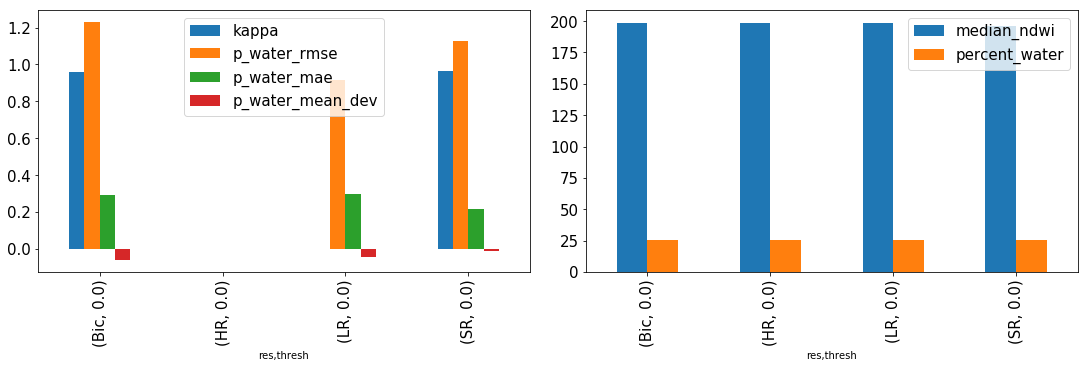

In [14]:
# groupby, then plot (legacy)

group11=group1.groupby(level='thresh', squeeze=True)

    # plot options
fs =15 # font size

# group11 =group1.reset_index()
# group11.groupby(['res', 'thresh']).mean()
# fig, ax = plt.subplots(len(group1.index.levels[0]),1)
k=0 # init
# group11.set_index(['thresh','res'])
for thresh, res in group11:
    print('Thres:', thresh, '\ngroup:\n')
#     print('Res:', res, '\ngroup:\n')
    display(res.head(20))
#     ax[k].bar(res)
#     plt.subplot(len(group1.index.levels[0]),1,k+1)

        # uncomment for various plots:
    fig, axs = plt.subplots(1, 2, figsize=(15, 5), constrained_layout=True)
#     res[['percent_water'	,'median_ndwi'	,'kappa',	'p_water_rmse',	'p_water_mae',		'p_water_mean_dev']].plot.bar(subplots=False) # rm cov
    res[['kappa',	'p_water_rmse',	'p_water_mae',		'p_water_mean_dev']].plot.bar(subplots=False, ax=axs[0], fontsize=fs) # rm cov
    res[['median_ndwi', 'percent_water']].plot.bar(subplots=False, ax=axs[1], fontsize=fs)
    for j in range(len(axs)): axs[j].legend(fontsize=fs)
    k+=1

,percent_water,median_ndwi,kappa,kappa_p,p_water_rmse,p_water_mae,p_water_cov,p_water_mean_dev
res,,,,,,,,
Bic,25.454658,198.636385,0.959795,0.024954,1.229084,0.291117,452.895096,-0.060458
HR,25.394200,198.464789,NaN,NaN,NaN,NaN,NaN,NaN
LR,25.436819,198.677934,NaN,NaN,0.915515,0.299729,452.983165,-0.042620
SR,25.403698,195.731690,0.966612,0.110436,1.129046,0.216900,454.678906,-0.009498


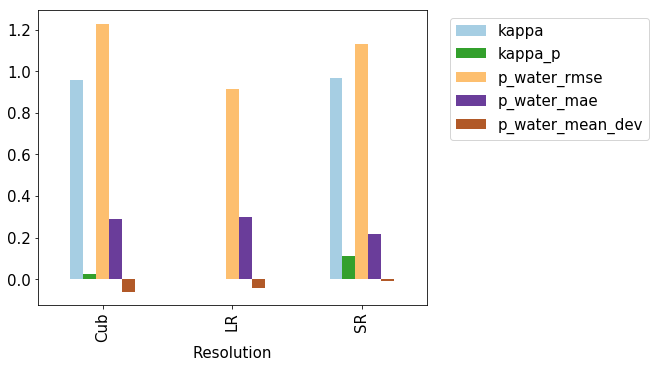

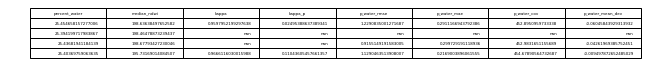

In [40]:
fs=15
fig, ax1 = plt.subplots(figsize=(9,5), constrained_layout=True)
# group1_plot=group1.iloc[[0,1,3]]
group1_plot=group1.copy()
group1_plot.reset_index(level=1,drop=True, inplace=True)
display(group1_plot)
# del group1_plot[2:3]
group1_plot.iloc[[0,2,3]][['kappa','kappa_p','p_water_rmse','p_water_mae','p_water_mean_dev']].plot.bar(ax=ax1, cmap='Paired')
# plt.xticks(range(4),['Cub','HR','LR','SR'], fontsize=fs)
plt.xticks(range(3),['Cub','LR','SR'], fontsize=fs)
plt.yticks(fontsize=fs)
# ax2=ax1.twinx()
# group1['percent_water'].plot.bar(ax=ax2)
# ax1.legend(fontsize=fs, loc='outer right')
ax1.legend(bbox_to_anchor=(1.04,1), loc="upper left", fontsize=fs)
ax1.set_xlabel('Resolution', fontsize=fs)

# savefig
fig.savefig(os.path.join(plots_dir, 'plot_supp1.png'), dpi=300)

# save table
fig2, ax2 = plt.subplots(figsize=(9,1), constrained_layout=True)
ax2.table(cellText=group1_plot.values, colLabels=group1_plot.columns, loc='center', fontsize=fs*2)
ax2.set_axis_off()
fig2.savefig(os.path.join(plots_dir, 'table_supp1.pdf'), bbox_inches='tight', dpi=300)

In [23]:
?plt.savefig

In [162]:
group1_plot=group1.copy()
group1_plot.reset_index(level=1,drop=True, inplace=True)
# group1_plot.drop_index()
group1_plot.iloc[2,:]
# group1_plot

AttributeError: __delitem__

,,percent_water,median_ndwi,kappa,kappa_p,p_water_rmse,p_water_mae,p_water_cov,p_water_mean_dev
res,thresh,,,,,,,,
Bic,0.0,25.454658,198.636385,0.959795,-0.072545,1.229084,0.291117,452.895096,-0.060458
HR,0.0,25.394200,198.464789,NaN,NaN,NaN,NaN,NaN,NaN
SR,0.0,25.403698,195.731690,0.966612,0.087026,1.129046,0.216900,454.678906,-0.009498


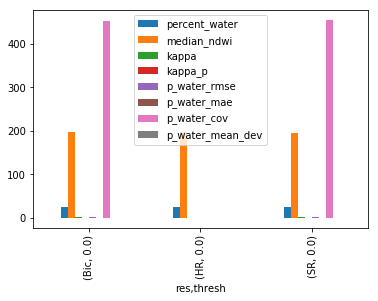

In [127]:
group1_plot.plot.bar()
# group1_plot[['kappa', 'kappa_p']].plot.bar()
group1_plot
# plt.bar(range(3),group1_plot)

# Scratch paper

In [13]:
# repeat in loop to save data vals for plotting
group1
for i in group1.index.levels[0]: # res
    for j in group1.index.levels[1]: # thresh
#         print(i)
        if i == 'HR':
            group1.loc[(i, j)].p_water_rmse, group1.loc[(i, j)].p_water_mae, group1.loc[(i, j)].p_water_mean_dev, group1.loc[(i, j)].p_water_mean_dev = (np.nan, np.nan, np.nan,np.nan)
        else:
            group1.loc[(i, j)].p_water_rmse=(metrics.mean_squared_error(dataW1.loc[('HR', j)].percent_water, dataW1.loc[(i, j)].percent_water))**0.5
            group1.loc[(i, j)].p_water_mae=metrics.mean_absolute_error(dataW1.loc[('HR', j)].percent_water, dataW1.loc[(i, j)].percent_water)
            group1.loc[(i, j)].p_water_cov=np.cov(pd.DataFrame(data=[dataW1.loc[('HR', j)].percent_water, dataW1.loc[(i, j)].percent_water]))[0,1]
            group1.loc[(i, j)].p_water_mean_dev=group1.loc[('HR', j)].percent_water-group1.loc[(i, j)].percent_water
        
group1

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:9: PerformanceWarning: indexing past lexsort depth may impact performance.
  if __name__ == '__main__':
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:10: PerformanceWarning: indexing past lexsort depth may impact performance.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:11: PerformanceWarning: indexing past lexsort depth may impact performance.
  # This is added back by InteractiveShellApp.init_path()


,,percent_water,median_ndwi,kappa,kappa_p,p_water_rmse,p_water_mae,p_water_cov,p_water_mean_dev
res,thresh,,,,,,,,
Bic,0.0,25.454658,198.636385,0.959795,0.024954,1.229084,0.291117,452.895096,-0.060458
HR,0.0,25.394200,198.464789,NaN,NaN,NaN,NaN,NaN,NaN
LR,0.0,25.436819,198.677934,NaN,NaN,0.915515,0.299729,452.983165,-0.042620
SR,0.0,25.403698,195.731690,0.966612,0.110436,1.129046,0.216900,454.678906,-0.009498


In [10]:
    # filter out rows with all or no water # uncomment to use # 
print('Ct length before: {}'.format(len(ct)))
print('Number of nearly uniform images: {}'.format(np.sum(np.all((ct.percent_water<2.) | (ct.percent_water>98.), axis=1))))
uniform_mask=np.all((ct.percent_water<2.) | (ct.percent_water>98.), axis=1)
ct.drop(index=(ct[uniform_mask]).index, inplace=True)
# del ct[uniform_mask]
print('Ct length after: {}'.format(len(ct)))

Ct length before: 2130
Number of nearly uniform images: 38
Ct length after: 2092


In [13]:
# filter out nearly uniform imgs, using index modified from ct

(ct[uniform_mask]).index
uniform_mask_dataW=np.isin(dataW.index.get_level_values(2), np.where(uniform_mask))
print('dataW length before: {}'.format(len(dataW)))
dataW.drop(index=(dataW[uniform_mask_dataW]).index, inplace=True)
print('dataW length after: {}'.format(len(dataW)))

dataW length before: 8520
dataW length after: 8368


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [16]:
# filter out nearly uniform imgs, using index modified from ct (for dataW)

print('data length before: {}'.format(len(data)))
data.drop(index=(data[uniform_mask_dataW]).index, inplace=True)
print('data length after: {}'.format(len(data)))

data length before: 8520
data length after: 8368
